In [125]:
import os
import shutil
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [16]:
os.chdir(r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset")
if os.path.isdir('train/0/') is False:
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')
    
    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')
        
        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        print(valid_samples)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')
            
        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
            
os.chdir('../..')

['IMG_5918.JPG', 'IMG_5867.JPG', 'IMG_5017.JPG', 'IMG_4466.JPG', 'IMG_4506.JPG', 'IMG_5042.JPG', 'IMG_4574.JPG', 'IMG_1179.JPG', 'IMG_4370.JPG', 'IMG_4446.JPG', 'IMG_5603.JPG', 'IMG_5971.JPG', 'IMG_4286.JPG', 'IMG_4254.JPG', 'IMG_4554.JPG', 'IMG_4826.JPG', 'IMG_4936.JPG', 'IMG_4413.JPG', 'IMG_1229.JPG', 'IMG_5736.JPG', 'IMG_5007.JPG', 'IMG_4139.JPG', 'IMG_5786.JPG', 'IMG_4456.JPG', 'IMG_4956.JPG', 'IMG_4725.JPG', 'IMG_4276.JPG', 'IMG_4745.JPG', 'IMG_5286.JPG', 'IMG_1239.JPG']
['IMG_5044.JPG', 'IMG_5858.JPG', 'IMG_4675.JPG', 'IMG_1240.JPG', 'IMG_4766.JPG', 'IMG_4172.JPG', 'IMG_4318.JPG', 'IMG_5951.JPG', 'IMG_5919.JPG', 'IMG_5686.JPG', 'IMG_4204.JPG', 'IMG_5267.JPG', 'IMG_1230.JPG', 'IMG_5214.JPG', 'IMG_5245.JPG', 'IMG_1170.JPG', 'IMG_4100.JPG', 'IMG_1291.JPG', 'IMG_5898.JPG', 'IMG_4080.JPG', 'IMG_4244.JPG', 'IMG_1271.JPG', 'IMG_5008.JPG', 'IMG_4414.JPG', 'IMG_4746.JPG', 'IMG_5549.JPG', 'IMG_4194.JPG', 'IMG_5133.JPG', 'IMG_5447.JPG', 'IMG_4130.JPG']
['IMG_4717.JPG', 'IMG_4918.JPG', 'IMG_

In [19]:
train_path = r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset\train"
valid_path = r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset\valid"
test_path = r"C:\Users\15088\OneDrive\Desktop\SEP 789 Final Project\data\Sign-Language-Dataset\test"

In [21]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224, 224), batch_size = 30)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224, 224), batch_size = 30)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=30, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## Modify Model

In [35]:
mobileNet = tf.keras.applications.mobilenet.MobileNet()

In [36]:
mobileNet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [37]:
len(mobileNet.layers)

92

In [38]:
x = mobileNet.layers[-6].output
x

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d_1')>

In [39]:
output = Dense(units = 10, activation = "softmax")(x)

In [70]:
model = keras.Model(inputs = mobileNet.input, outputs = output)

In [71]:
for layer in model.layers[: -23]:
    layer.trainable = False

In [72]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0   

## Model Training

In [73]:
model.compile(optimizer = keras.optimizers.Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [74]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=2,patience=25)

In [75]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2, callbacks=[early_stop])

Epoch 1/10
58/58 - 38s - loss: 0.0225 - accuracy: 0.9959 - val_loss: 0.0691 - val_accuracy: 0.9800
Epoch 2/10
58/58 - 35s - loss: 0.0121 - accuracy: 0.9959 - val_loss: 0.0450 - val_accuracy: 0.9900
Epoch 3/10
58/58 - 35s - loss: 0.0086 - accuracy: 0.9988 - val_loss: 0.0375 - val_accuracy: 0.9900
Epoch 4/10
58/58 - 36s - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.0339 - val_accuracy: 0.9933
Epoch 5/10
58/58 - 34s - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0329 - val_accuracy: 0.9933
Epoch 6/10
58/58 - 35s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0336 - val_accuracy: 0.9933
Epoch 7/10
58/58 - 35s - loss: 0.0013 - accuracy: 0.9994 - val_loss: 0.0406 - val_accuracy: 0.9933
Epoch 8/10
58/58 - 35s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0450 - val_accuracy: 0.9933
Epoch 9/10
58/58 - 35s - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0429 - val_accuracy: 0.9933
Epoch 10/10
58/58 - 37s - loss: 6.5749e-04 - accuracy: 1.0000 - val_loss: 0.0407 - val_accuracy: 0.9933


<AxesSubplot:>

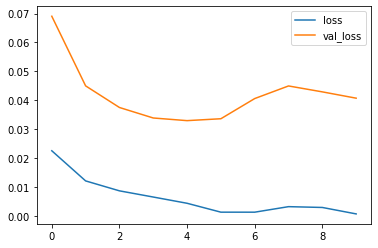

In [79]:
history = pd.DataFrame(model.history.history).filter(['loss', 'val_loss'])
history.plot()

<AxesSubplot:>

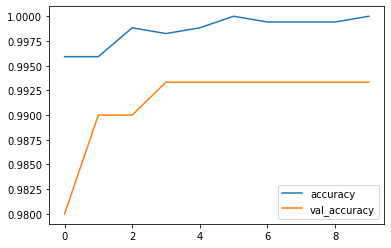

In [80]:
history = pd.DataFrame(model.history.history).filter(['accuracy', 'val_accuracy'])
history.plot()

## Model Testing

In [98]:
test_labels = test_batches.classes

In [99]:
predictions = model.predict(x=test_batches, verbose=2)

2/2 - 1s


In [100]:
predictions.argmax(axis=1)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9], dtype=int64)

In [101]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [102]:
cm

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 5, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 5]], dtype=int64)

In [107]:
model.save("tuned_mobilenet.h5")

In [133]:
np.expand_dims(test_batches.next()[0][0], axis = 0).shape

(1, 224, 224, 3)

In [134]:
pred = model.predict(np.expand_dims(test_batches.next()[0][0], axis = 0))

In [135]:
pred

array([[1.0000000e+00, 4.0911166e-10, 9.4423691e-11, 1.9799973e-12,
        6.2022176e-12, 4.9182335e-14, 2.2155179e-08, 8.9730184e-10,
        2.0073934e-10, 1.1193694e-09]], dtype=float32)

## Convert Keras Model to TF.js format

In [138]:
!pip install tensorflowjs

You should consider upgrading via the 'c:\users\15088\anaconda3\python.exe -m pip install --upgrade pip' command.


In [139]:
import tensorflowjs as tfjs

In [141]:
tfjs.converters.save_keras_model(model, "tuned_mobilenet_js")